# Linear Regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline


In [18]:
data=pd.read_csv('Ecommerce Customers')


.head() function returns the first five rows ,so we can get an idea about our data

In [19]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [20]:
data.shape

(500, 8)


we delete the address column as it will not be useful for prediction

In [21]:
del data['Email']

In [22]:
del data['Address']

In [23]:
del data['Avatar']

In [24]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


now construct a jointlot to visualize the connections between the time on app and yearly amount spent

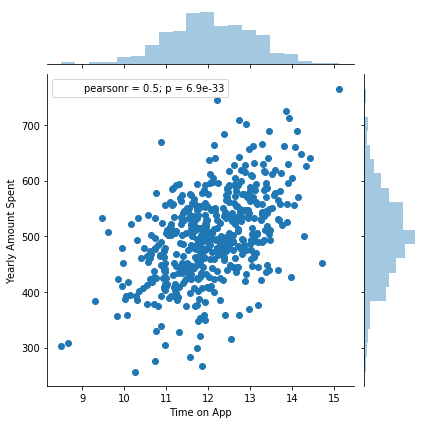

In [25]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data,kind='scatter')

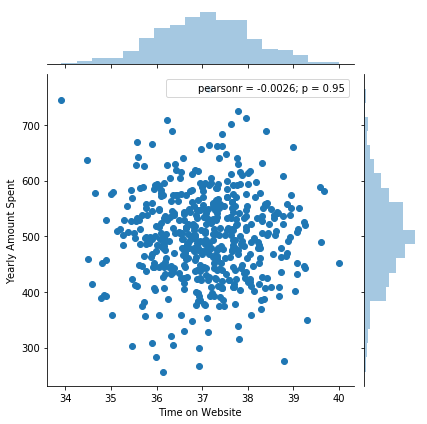

In [26]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data,kind='scatter')

In [27]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092



we grab our target variable(Yearly Amount Spent) as Y and all other features as X

In [28]:
X=data.iloc[:,:4]

In [29]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [30]:
Y=data.iloc[:,4]

In [31]:
Y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [32]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=29)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
r=LinearRegression().fit(X_train,Y_train)

In [36]:
y_pred=r.predict(X_test)

In [37]:
r.coef_

array([26.16829234, 39.19094994,  0.55791112, 61.3732318 ])

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 8.662147325533148
MSE: 115.08570759661859
RMSE: 10.727800687774666


the above metrics are used to evaluate the linear regression model

# Conclusions

In [42]:
coeffecients = pd.DataFrame(r.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,26.168292
Time on App,39.190950
Time on Website,0.557911
Length of Membership,61.373232


suggest developing the app since it is  associated with an increase of 38.59 total dollars spent.